In [12]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Visualiazation
import seaborn as sns
import matplotlib.pyplot as plt

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

path_data = 'input_files/Puzzle/'
path_train = path_data + 'train.txt'
path_test = path_data + 'test.txt'

In [13]:
def value_distribution(df_, col_, n_):
    
    ''' Check the share '''

    print(round(df_[col_].value_counts(normalize=True)*100, 2)[:n_])
    sns.countplot(x=col_, data=df_)
    plt.xticks(rotation=90)
    
        
def column_visualizatin(df_, col_, target_, koef_, with_target_=False):
    
    fig, ax = plt.subplots() 
    ax.hist(df_[col_], color='g', alpha=0.5, normed=True, label=col_) 
    
    if with_target_:
        df_grouped_ = df_[[col_, target_]].groupby([col_]).mean().reset_index()
        df_grouped_[target_] = df_grouped_[target_].astype('float')/koef_
        ax.plot(df_grouped_[col_], df_grouped_[target_], color='r', label=target_)

    ax.set(title=col_)
    ax.legend(loc='best')
    plt.show()
    
def share_of_missing_per_column(df_):
    
    ''' Share of missing values per column '''
    
    data = []
    for col in list(df_.columns):
        if (df_[col].isnull().sum() > 0):
            data.append([col, '{}%'.format(round(100*df_[col].isnull().sum()/df_[col].shape[0], 2)), df_[col].isnull().sum()])
     
    if (len(data) == 0):
        print('No missing data')
    else:
        return pd.DataFrame.from_records(data, columns=['Column', 'Missing_share', 'Missing_amount']).sort_values(by=['Missing_share'], ascending=False)

## Import
read Train/Test sets 

In [14]:
df_train = pd.read_csv(path_train, sep='\t')
df_test = pd.read_csv(path_test, sep='\t')
target = 'Step'

FileNotFoundError: File b'input_files/Puzzle/train.txt' does not exist

## Overview
simple information

In [4]:
print('Train shape:', df_train.shape)
df_train.head(2)

Train shape: (8678, 66)


,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,66
0,-47,0,-5,-27,-11,-19,-2,-33,37,0,...,0,2,-4,-3,4,-23,-68,15,C,0
1,1,1,-2,-3,-1,-3,39,10,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0


In [5]:
print('Test shape:', df_test.shape)
df_test.head(2)

Test shape: (3000, 66)


,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,66
0,-47,0,-5,-27,-11.0,-19.0,-2.0,-33.0,37,0,...,0,2,-4,-3,4,-23,-68,15,A,0
1,1,1,-2,-3,-1.0,-3.0,39.0,10.0,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0


## Target
info abou target variable

Distribution of target variable:
2    25.37
0    25.09
1    24.80
3    24.74
Name: 66, dtype: float64


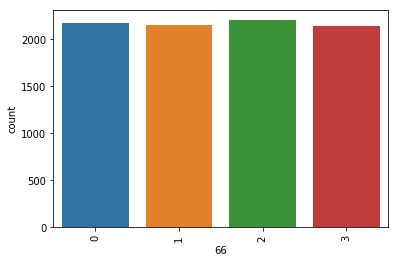

In [9]:
print('Distribution of target variable:')
value_distribution(df_train, target, 10)

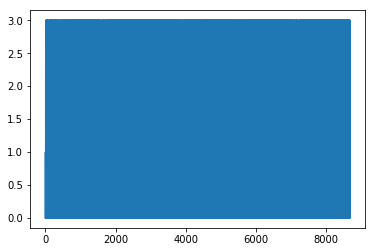

In [7]:
df_train[target].plot()
plt.show()

## Missing data
share of missing values per column

In [11]:
share_of_missing_per_column(df_train)

No missing data


In [12]:
share_of_missing_per_column(df_test)

,Column,Missing_share,Missing_amount
5,18,0.1%,3
4,15,0.07%,2
0,5,0.03%,1
1,6,0.03%,1
2,7,0.03%,1
3,8,0.03%,1
6,19,0.03%,1
7,20,0.03%,1
8,23,0.03%,1


## Data types
cstegorical/numerical columns identification

In [13]:
cat_cols, num_cols = [], []

for col in df_train.columns:
    if df_train[col].dtype == object:
        cat_cols.append(col)
    else:
        num_cols.append(col)
print('Numerical columns {}, categorical columns {}'.format(len(num_cols), len(cat_cols)))
cat_cols

Numerical columns 65, categorical columns 1


['65']

In [14]:
df_train.dtypes.value_counts()

int64     65
object     1
dtype: int64

In [15]:
df_test.dtypes.value_counts()

int64      56
float64     9
object      1
dtype: int64

## Staistic

In [16]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,66
count,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,...,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.00000,8678.000000
mean,-0.540678,-0.699931,-0.738073,-0.695322,-0.290389,-0.584006,-1.329339,-0.711800,-0.647154,-0.569717,...,-0.993201,-0.889260,-0.769417,-0.798802,-0.703734,-0.211569,-0.548168,-1.291427,-0.65038,1.497695
std,18.662137,11.767761,4.980516,7.457261,17.808756,25.807365,25.108626,15.420846,18.198702,11.755683,...,14.984324,18.060042,12.006124,4.988805,7.376874,17.604249,25.355864,25.483292,15.31861,1.116549
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-107.000000,-124.000000,-46.000000,-74.000000,-97.000000,-128.000000,-128.000000,-124.00000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.00000,0.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.00000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,5.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.00000,2.000000
max,111.000000,90.000000,30.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,89.000000,...,108.000000,127.000000,105.000000,29.000000,51.000000,81.000000,127.000000,127.000000,123.00000,3.000000


In [17]:
df_test.describe()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,66
count,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,2999.000000,2999.000000,2999.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.221667,-0.671000,-0.775333,-0.556333,-0.237079,0.053018,-1.201067,-0.823608,-0.403333,-0.569000,...,-1.073667,-0.643333,-0.536333,-0.759000,-0.640333,-0.484333,-1.093000,-1.145000,-0.239000,1.511000
std,19.171864,11.981372,4.895390,7.122762,18.219809,25.667685,24.721583,15.252923,18.533388,11.603999,...,14.629727,17.972807,11.563127,4.968214,7.243880,18.029830,25.543463,25.250938,15.381138,1.101945
min,-101.000000,-99.000000,-33.000000,-75.000000,-90.000000,-122.000000,-128.000000,-116.000000,-95.000000,-79.000000,...,-104.000000,-96.000000,-124.000000,-31.000000,-69.000000,-94.000000,-128.000000,-128.000000,-119.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-11.000000,-14.000000,-5.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-11.000000,-15.000000,-5.000000,-7.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,11.000000,14.000000,4.000000,6.000000,7.000000,3.000000,...,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,2.000000
max,111.000000,85.000000,25.000000,52.000000,78.000000,125.000000,127.000000,112.000000,127.000000,76.000000,...,108.000000,127.000000,105.000000,26.000000,37.000000,81.000000,112.000000,127.000000,99.000000,3.000000


## Train VS Test 
numerical statistic per column

In [19]:
data, lst = [], list(df_train.columns)
lst.pop(lst.index(target))

for col in lst:
    if col in num_cols:
        eql_median = False

        if df_train[col].median() == df_test[col].median():
            eql_median = True

        data.append([col, 
                     df_train[col].median(),
                     df_test[col].median(),
                     eql_median,
                     df_train[col].mean(),
                     df_test[col].mean(),
                     df_train[col].var(),
                     df_test[col].var()
                     ])
pd.DataFrame.from_records(data, columns=['Column', 
                                         'Train_median', 'Test_median', 
                                         'Equal_medians',
                                         'Train_mean', 'Test_mean', 
                                         'Train_var', 'Test_var', 
                                        ]).head(5)

,Column,Train_median,Test_median,Equal_medians,Train_mean,Test_mean,Train_var,Test_var
0,1,-1.0,-1.0,True,-0.540678,-0.221667,348.275342,367.560384
1,2,-1.0,-1.0,True,-0.699931,-0.671000,138.480191,143.553277
2,3,-1.0,-1.0,True,-0.738073,-0.775333,24.805537,23.964847
3,4,-1.0,-1.0,True,-0.695322,-0.556333,55.610745,50.733738
4,5,0.0,0.0,True,-0.290389,-0.237079,317.151806,331.961453


## Correlation

In [20]:
# calculate Pearson's correlation
# corr, _ = pearsonr(df_train['65'], df_train['66'])

In [21]:
# plt.figure(figsize=(8, 8))
# sns.heatmap(df_train.corr(), square=True, annot=True)

In [22]:
abs(df_train.corr().unstack()).sort_values(ascending=False).drop_duplicates()[1:10]

59  60    0.519504
22  21    0.518937
19  20    0.514314
4   3     0.509902
45  46    0.509217
35  36    0.505370
11  12    0.504063
29  30    0.504028
5   6     0.502558
dtype: float64

## Columns

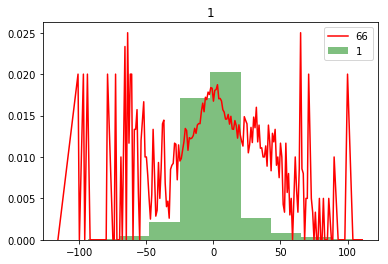

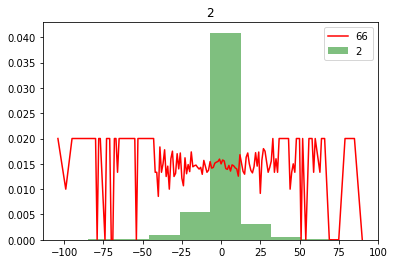

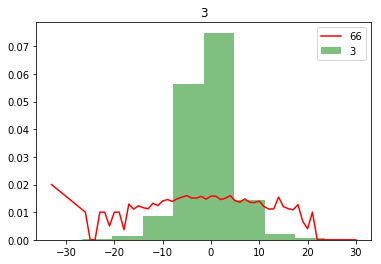

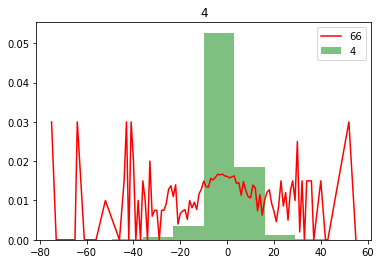

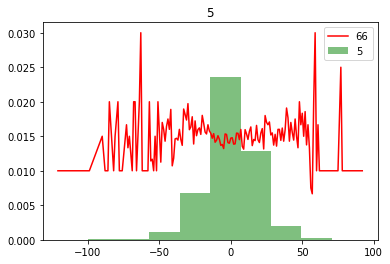

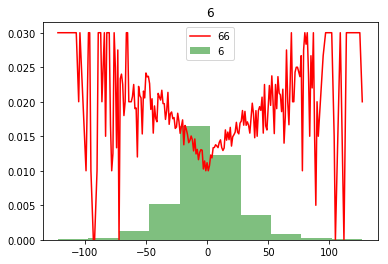

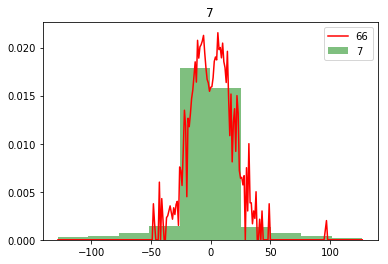

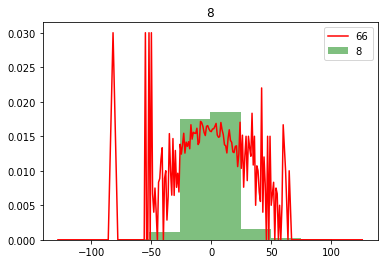

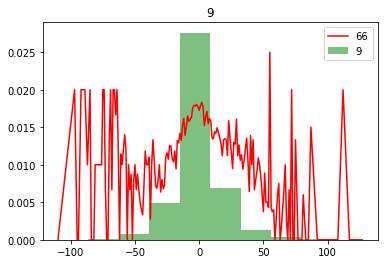

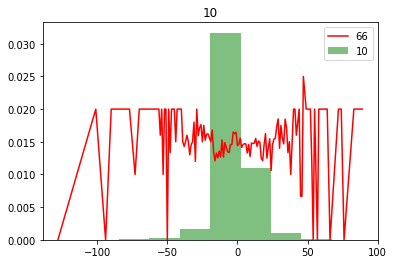

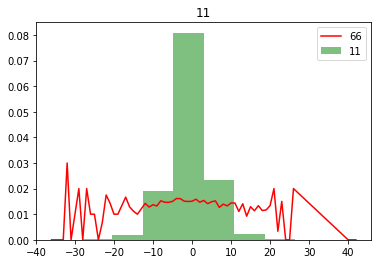

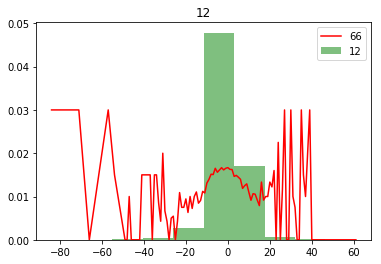

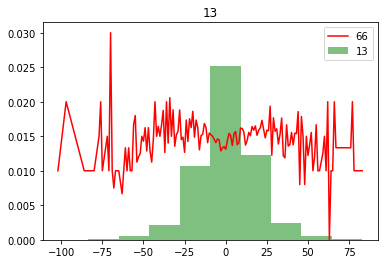

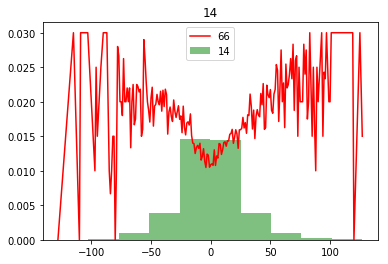

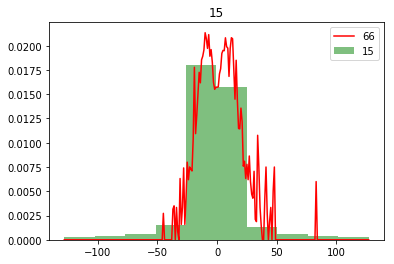

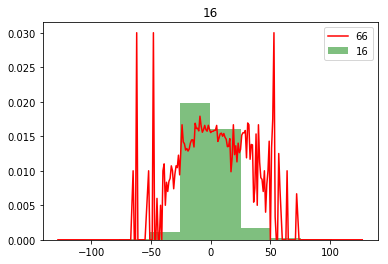

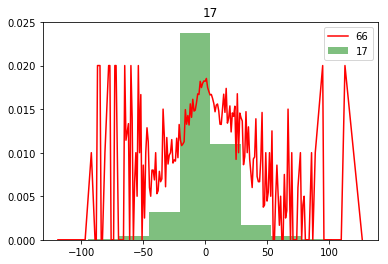

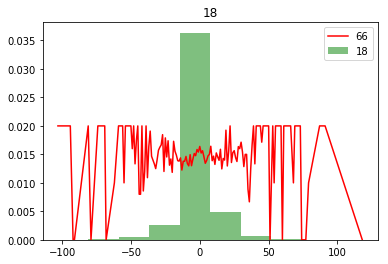

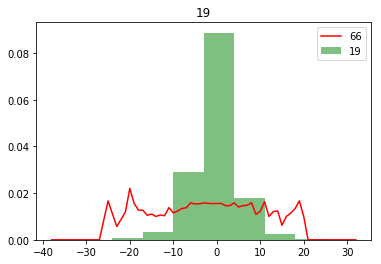

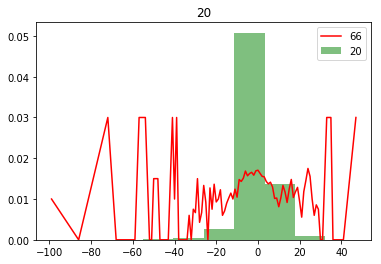

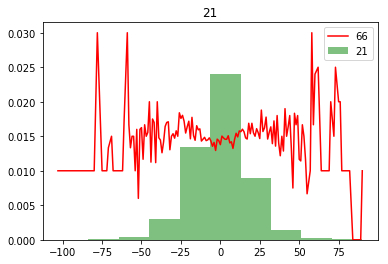

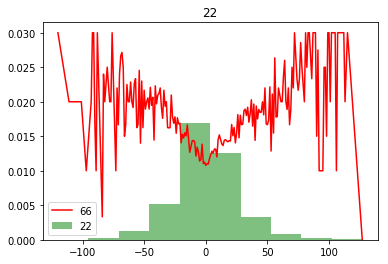

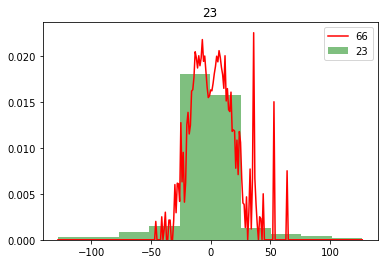

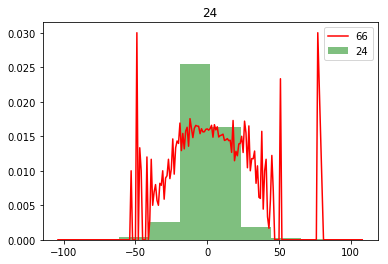

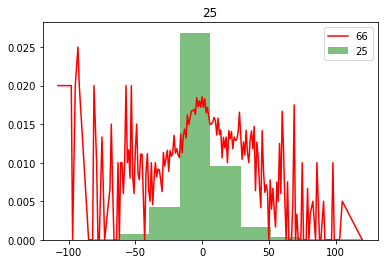

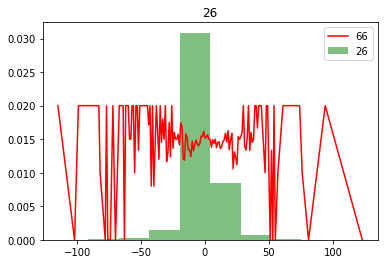

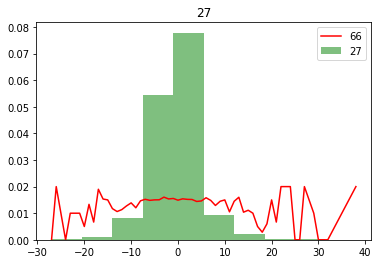

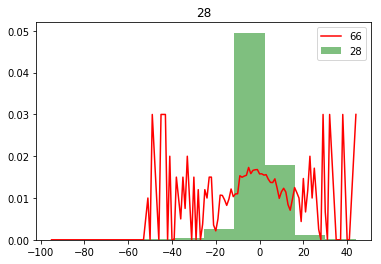

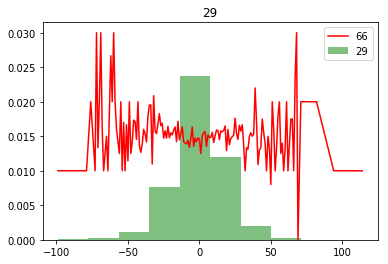

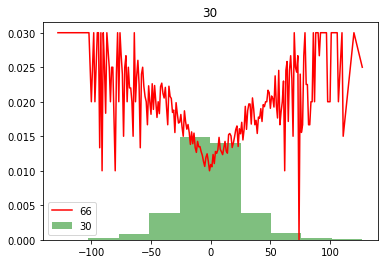

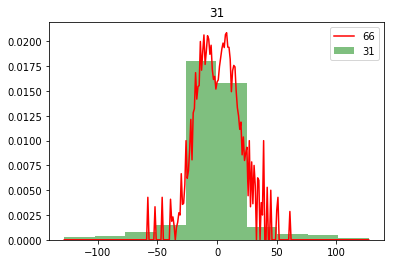

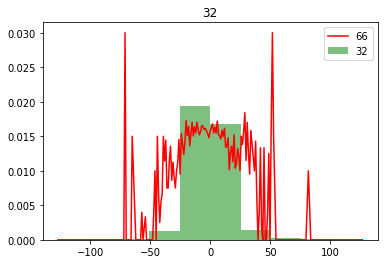

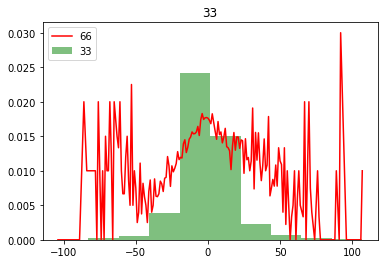

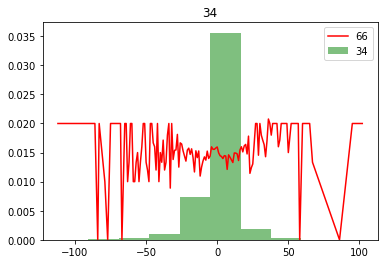

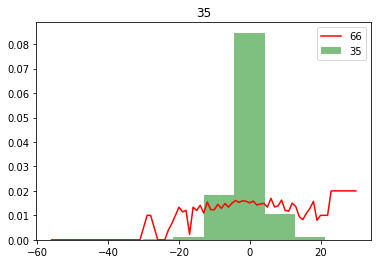

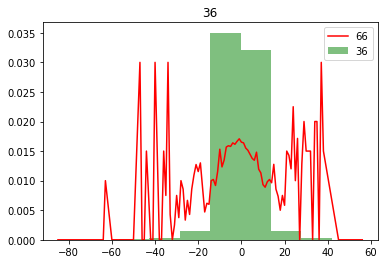

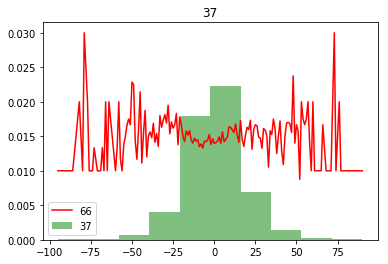

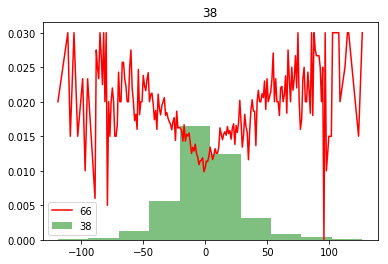

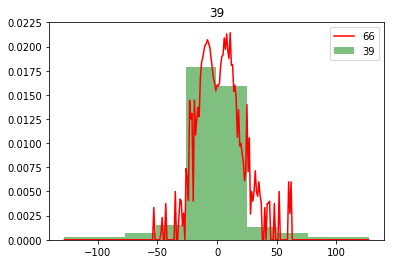

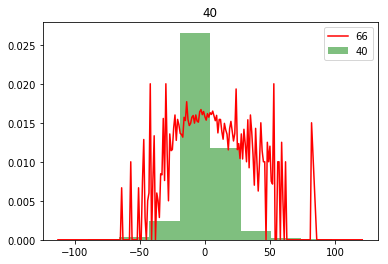

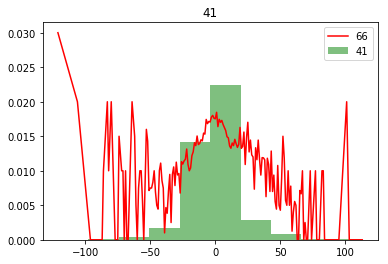

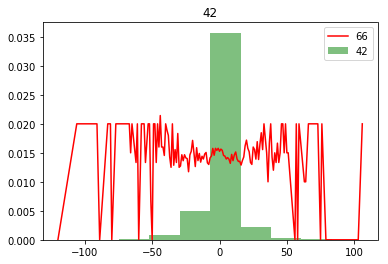

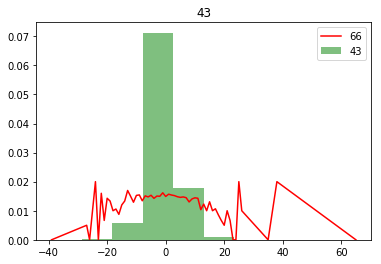

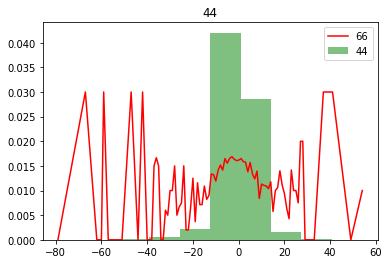

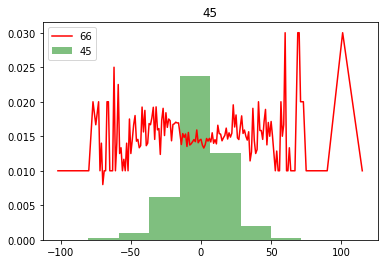

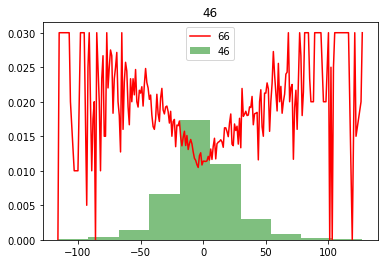

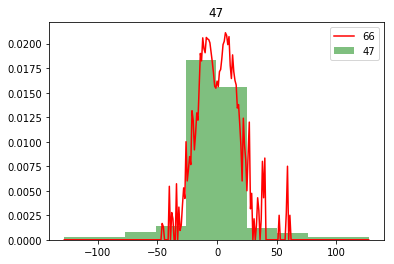

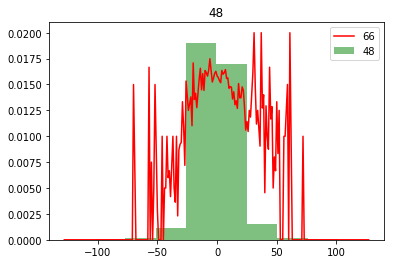

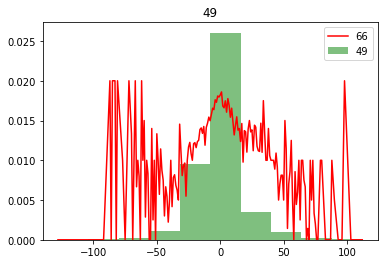

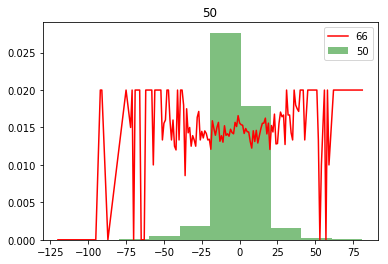

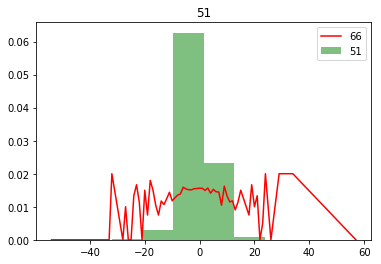

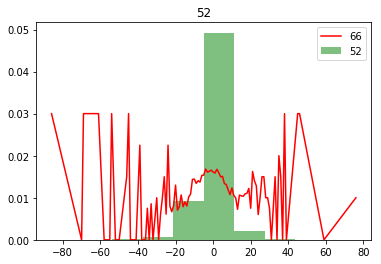

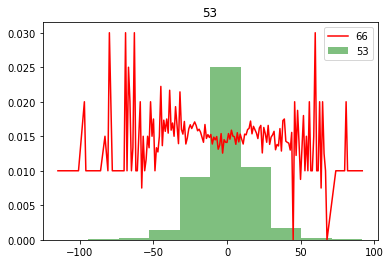

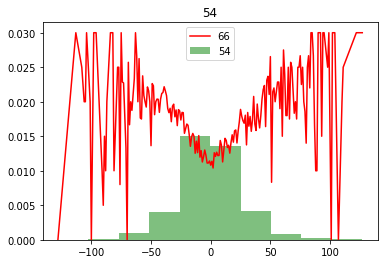

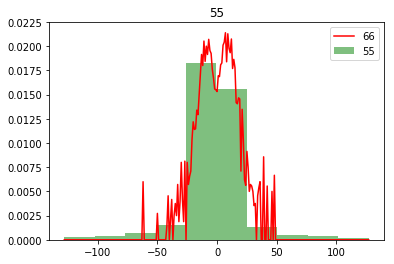

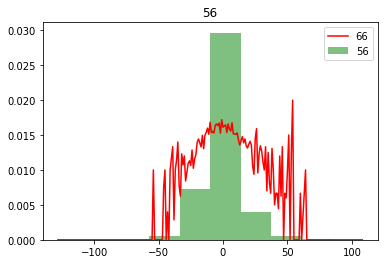

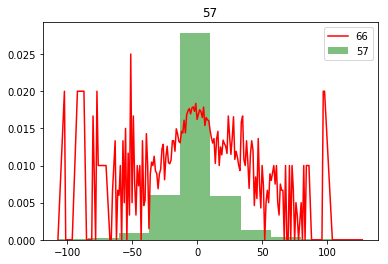

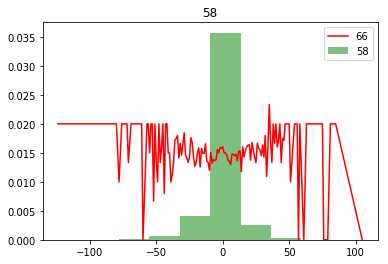

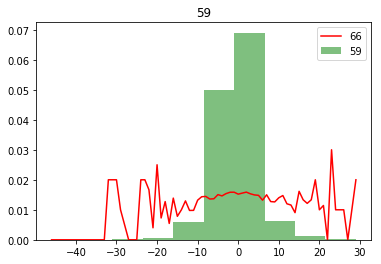

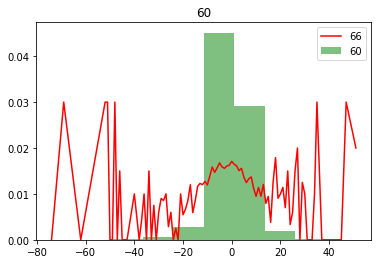

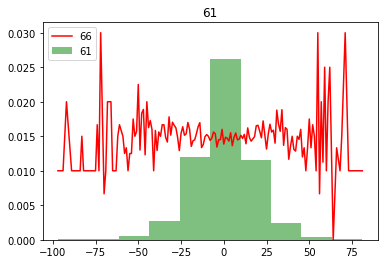

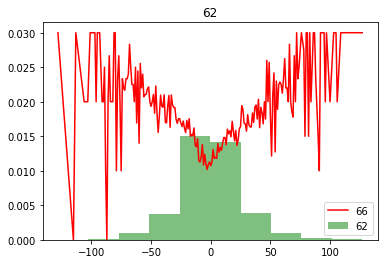

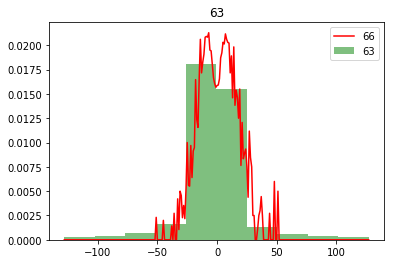

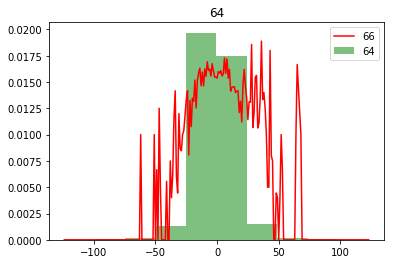

ValueError: color kwarg must have one color per dataset

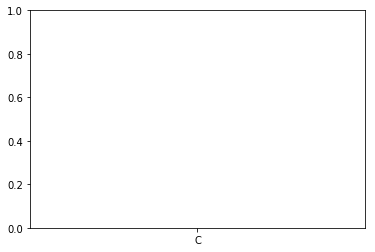

In [27]:
for i in range(0, len(df_train.columns)):
    column_visualizatin(df_train, df_train.columns[i] , target, 100, True)